In [64]:
import os
from pathlib import Path
from tqdm import tqdm
from PIL import ImageOps

In [18]:
path_labels = Path(r'D:\projects\ai_pos_terminal\ai_pos_terminal\check_markup_results\labels')

In [19]:
path_labels_original = Path(r'C:\Users\dimaz\OneDrive\Рабочий стол\sample_defect\labels')

In [39]:
for filename in tqdm(os.listdir(path_labels_original)):
    filename_label = path_labels_original / filename
    with open(filename_label, 'r') as file:
        f = file.readlines()
    with open(path_labels / filename, 'w') as file:
        for i, row in enumerate(f):
            replace_with = '\n'
            if i==len(f)-1:
                replace_with = ''
            row = row[:-3] + replace_with
            file.write(row)

100%|██████████| 100/100 [00:00<00:00, 3125.69it/s]


In [ ]:
['screen_attrition',
'screen_finger_marks_dirt',
'screen_dense_dirt',
'screen_dot_dirt',
'screen_scratch',
'screen_stain_dirt',
'key_side_dirt',
'key_plain_attrition',
'key_convex_attrition',
'key_arrow_dirt',
'key_convex_dirt',
'key_plain_fat_dirt',
'key_plain_dot_dirt',
'body_cavity_dirt',
'body_dot_dust_dirt',
'body_splash_dirt',
'body_hair_dust_dirt',
'body_oil_splash_dirt',
'body_dot_dirt',
'body_attrition',
'body_card_attrition',
'body_scratch']

In [53]:
from PIL import Image
import matplotlib.pyplot as plt

In [54]:
dict_class = {
	'0': 'screen_attrition',
	'1': 'screen_finger_marks_dirt',
	'2': 'screen_dense_dirt',
	'3': 'screen_dot_dirt',
	'4': 'screen_scratch',
	'5': 'screen_stain_dirt',
	'6': 'key_side_dirt',
	'7': 'key_plain_attrition',
	'8': 'key_convex_attrition',
	'9': 'key_arrow_dirt',
	'10': 'key_convex_dirt',
	'11': 'key_plain_fat_dirt',
	'12': 'key_plain_dot_dirt',
	'13': 'body_cavity_dirt',
	'14': 'body_dot_dust_dirt',
	'15': 'body_splash_dirt',
	'16': 'body_hair_dust_dirt',
	'17': 'body_oil_splash_dirt',
	'18': 'body_dot_dirt',
	'19': 'body_attrition',
	'20': 'body_card_attrition',
	'21': 'body_scratch'
}

In [55]:
def get_defect_bbox(box, im):
    splitted = box.replace('\n', '').split(' ')
    class_id = int(splitted[0])
    xc, yc, w, h = list(map(float, splitted[1:]))
    x1 = (xc - w/2) * im.size[0]
    x2 = (xc + w/2) * im.size[0]
    y1 = (yc - h/2) * im.size[1]
    y2 = (yc + h/2) * im.size[1]
    return class_id, x1, y1, x2, y2

In [65]:
path_images = Path('D:/projects/ai_pos_terminal/ai_pos_terminal/check_markup_results/images/')
path_labels = Path('D:/projects/ai_pos_terminal/ai_pos_terminal/check_markup_results/labels/')

for filename in os.listdir(path_images):
    path_image = path_images / filename
    short = filename.split('.')[0]
    path_label = (path_labels / short).__str__() + '.txt'

    im = Image.open(path_image)
    im = ImageOps.exif_transpose(im)
    plt.figure(figsize=(20, 20))
    plt.imshow(im)
    plt.axis('off')
    with open(path_label, 'r') as file:
        yolo_boxes = file.readlines()
    bbox_data = []
    for box in yolo_boxes:
        class_id, x1, y1, x2, y2 = get_defect_bbox(box, im)
        class_id = str(class_id)
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, linewidth=2, edgecolor='red')
        plt.gca().add_patch(rect)
        plt.gca().text(x1, y1 - 10, f"{dict_class[class_id]}", color='white', fontsize=9,
            bbox=dict(facecolor='red', alpha=0.5))
    plt.savefig(f'check/{filename}')
    plt.clf()
    plt.cla()
    plt.close()

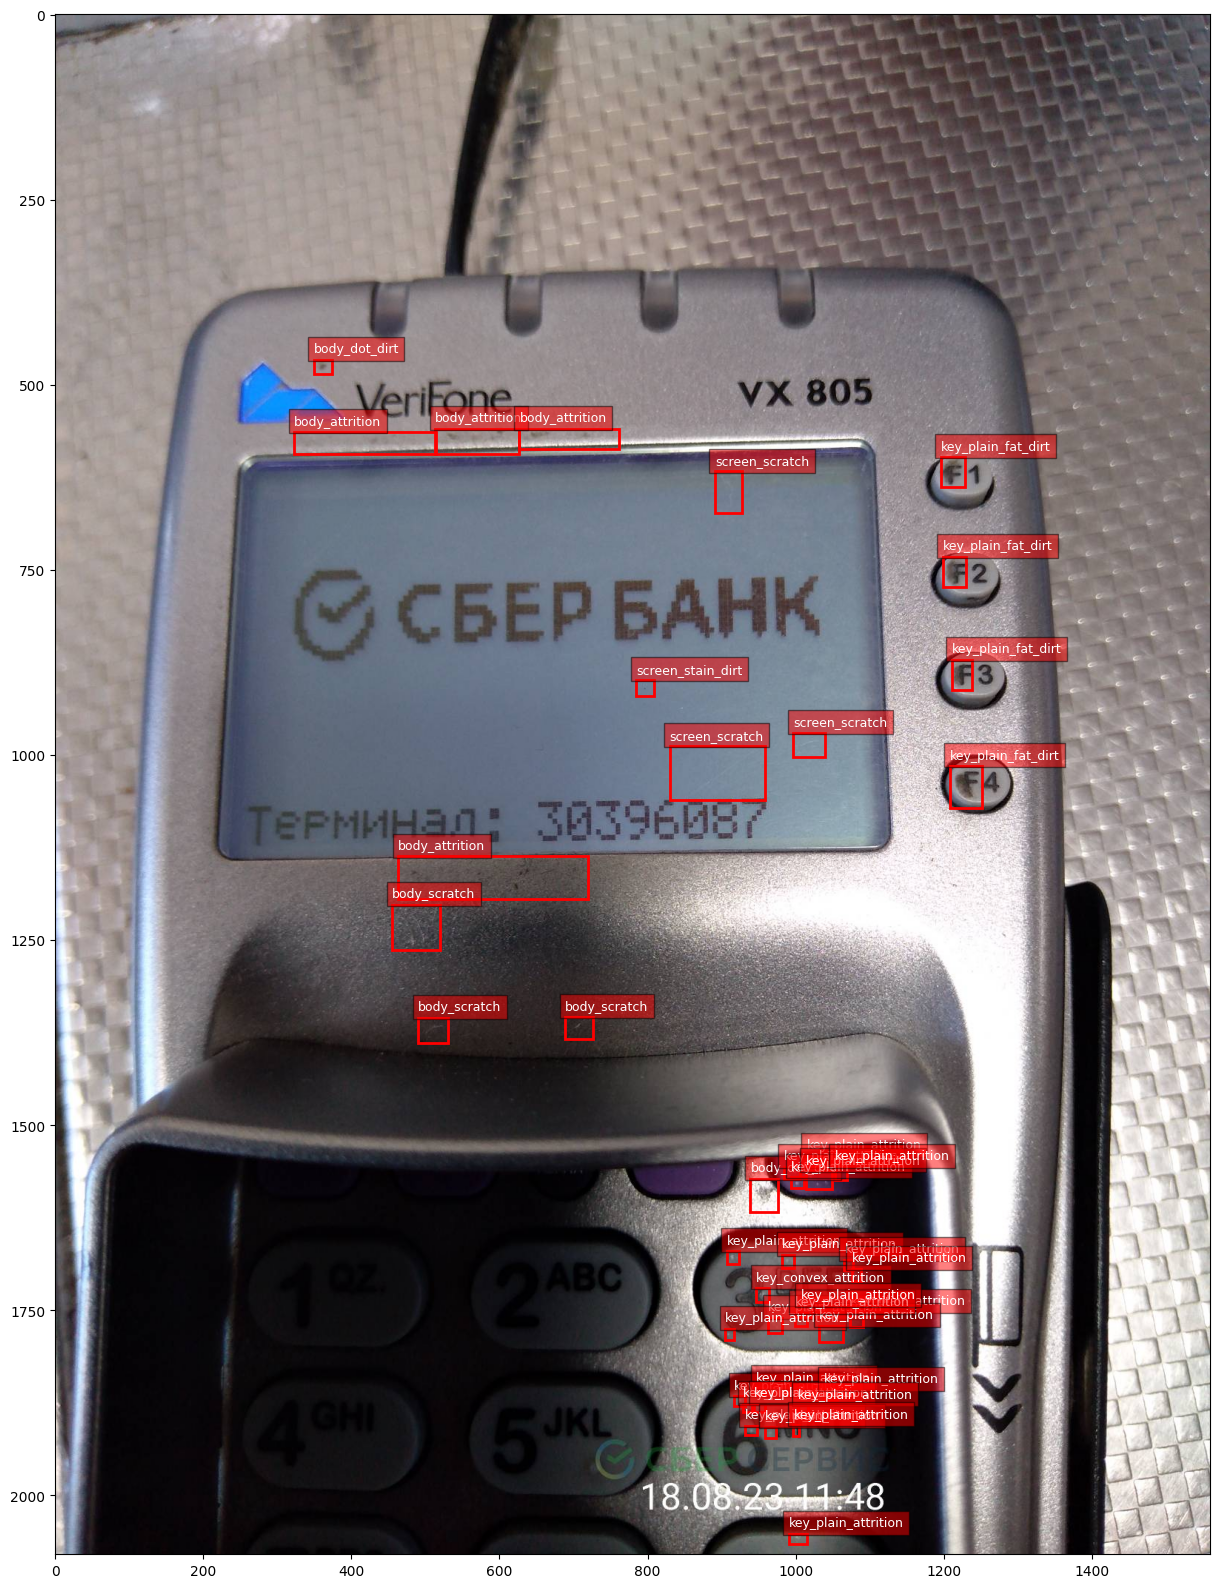

In [52]:
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open(path_image)
plt.figure(figsize=(20, 20))
plt.imshow(im)
with open(path_label, 'r') as file:
    yolo_boxes = file.readlines()
bbox_data = []
for box in yolo_boxes:
    class_id, x1, y1, x2, y2 = get_defect_bbox(box, im)
    class_id = str(class_id)
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, linewidth=2, edgecolor='red')
    plt.gca().add_patch(rect)
    plt.gca().text(x1, y1 - 10, f"{dict_class[class_id]}", color='white', fontsize=9,
        bbox=dict(facecolor='red', alpha=0.5))